В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [2]:
df = pd.read_csv('../data/yulu_rental.csv')

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [89]:
df.head(3)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [21]:
df.shape

(10886, 12)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [26]:
df['datetime'] = pd.to_datetime(df.datetime)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

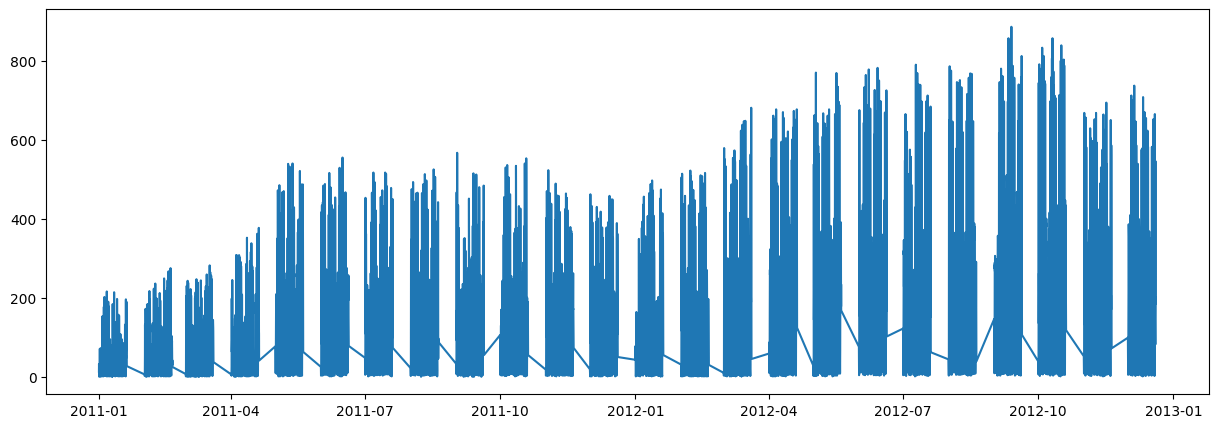

In [114]:
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['registered']);

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [45]:
df['date'] = df.datetime.dt.date

In [48]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [82]:
df_registered_by_date = df.groupby('date')['registered'].sum().reset_index()
df_registered_by_date

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

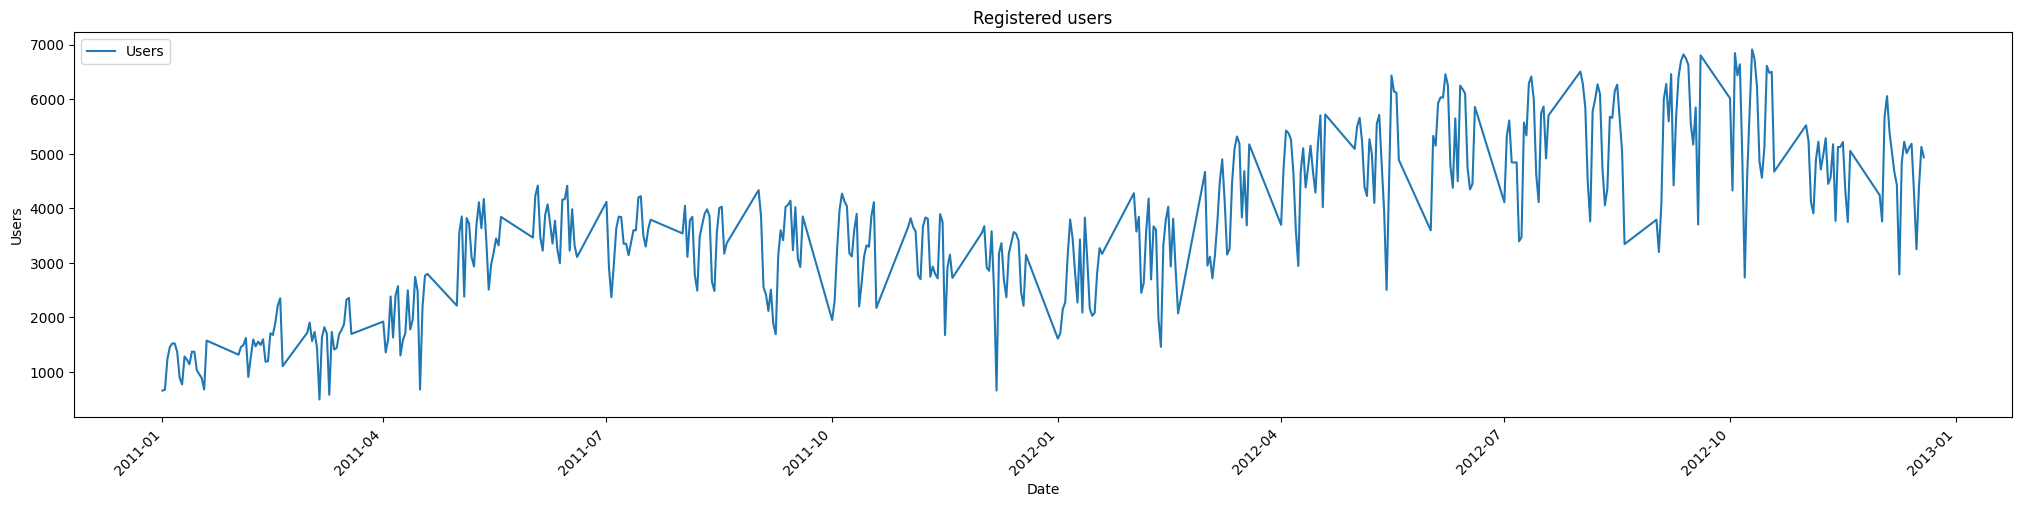

In [112]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=45, ha='right')
plt.plot(df_registered_by_date['date'], df_registered_by_date['registered'], label='Users')
plt.title('Registered users')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc='upper left');

Мабуть, на практиці для подібних даних використовують іншу візуалізацію. Так? Бо по-перше графік геть не гарний)) але це субʼєктивно, розумію. А по-друге (це головне) з ним важко розледіти то все, що нам потрібно.

Графік показує динаміку кількості зареєстрованих користувачів за період з 2011-2013 роки.

1. Загальне зростання:
   - Кількість користувачів поступово зростає
   - Це свідчить про успіх сервісу протягом цього часу.
2. Коливання:
   - Хоча тренд висхідний, коливання в кількості реєстрацій дуже відрізняється. Можливі причини:
     - денні коливання можуть залежати від погоди та дня тижня (або святкових днів). Це можливо первірити за наявними даними.
     - більш глобальні коливання на графіку можуть бути повʼязані із маркетинговими кампаніями, а також порами року (видно, що тенденція до зменшення реєстрацій якраз у період
       листопад-лютий)

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

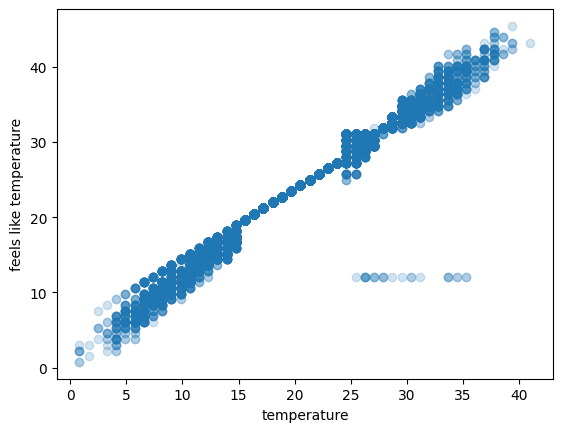

In [99]:
plt.figure()
plt.scatter(df['temp'], df['atemp'], alpha=0.2)
plt.xlabel('temperature')
plt.ylabel('feels like temperature')
plt.show()

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


1. Більшість точок розміщені по діагоналі, у висхідному напрямку. Це свідчить про те, що між фактичною температурою і тим, як вона відчувається, є чітка лінійна залежність.
   Що є логічним.
2. На графіку також є аномальні точки. При фактичній температурі від 25°C до 35°C по осі Х - значення по осі У залишається незмінним ~12°C. Ці дані значно відрізняться від інших, тому мають бути окремо дослідженні. Причинами можуть помилки у вимірюваннях, помилки при обробці і записі даних або, можливо, це якісь абсолютно унікальні природні явища (вологість, вітер тощо), які разом впливають на відчуття температури.

Висновки:
- основна маса даних показує лінійну залежність між фактичною і відчутною температурою.
- причини виникнення аномальних даних мають бути досліджені для підвищення якості даних або розуміння особливих умов, при яких були зібрані ці дані.